In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
#IMPORTING RELEVANT FILES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Loading the train and test sets
df_train = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
df_test = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")


df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entri

In [4]:
df_train

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


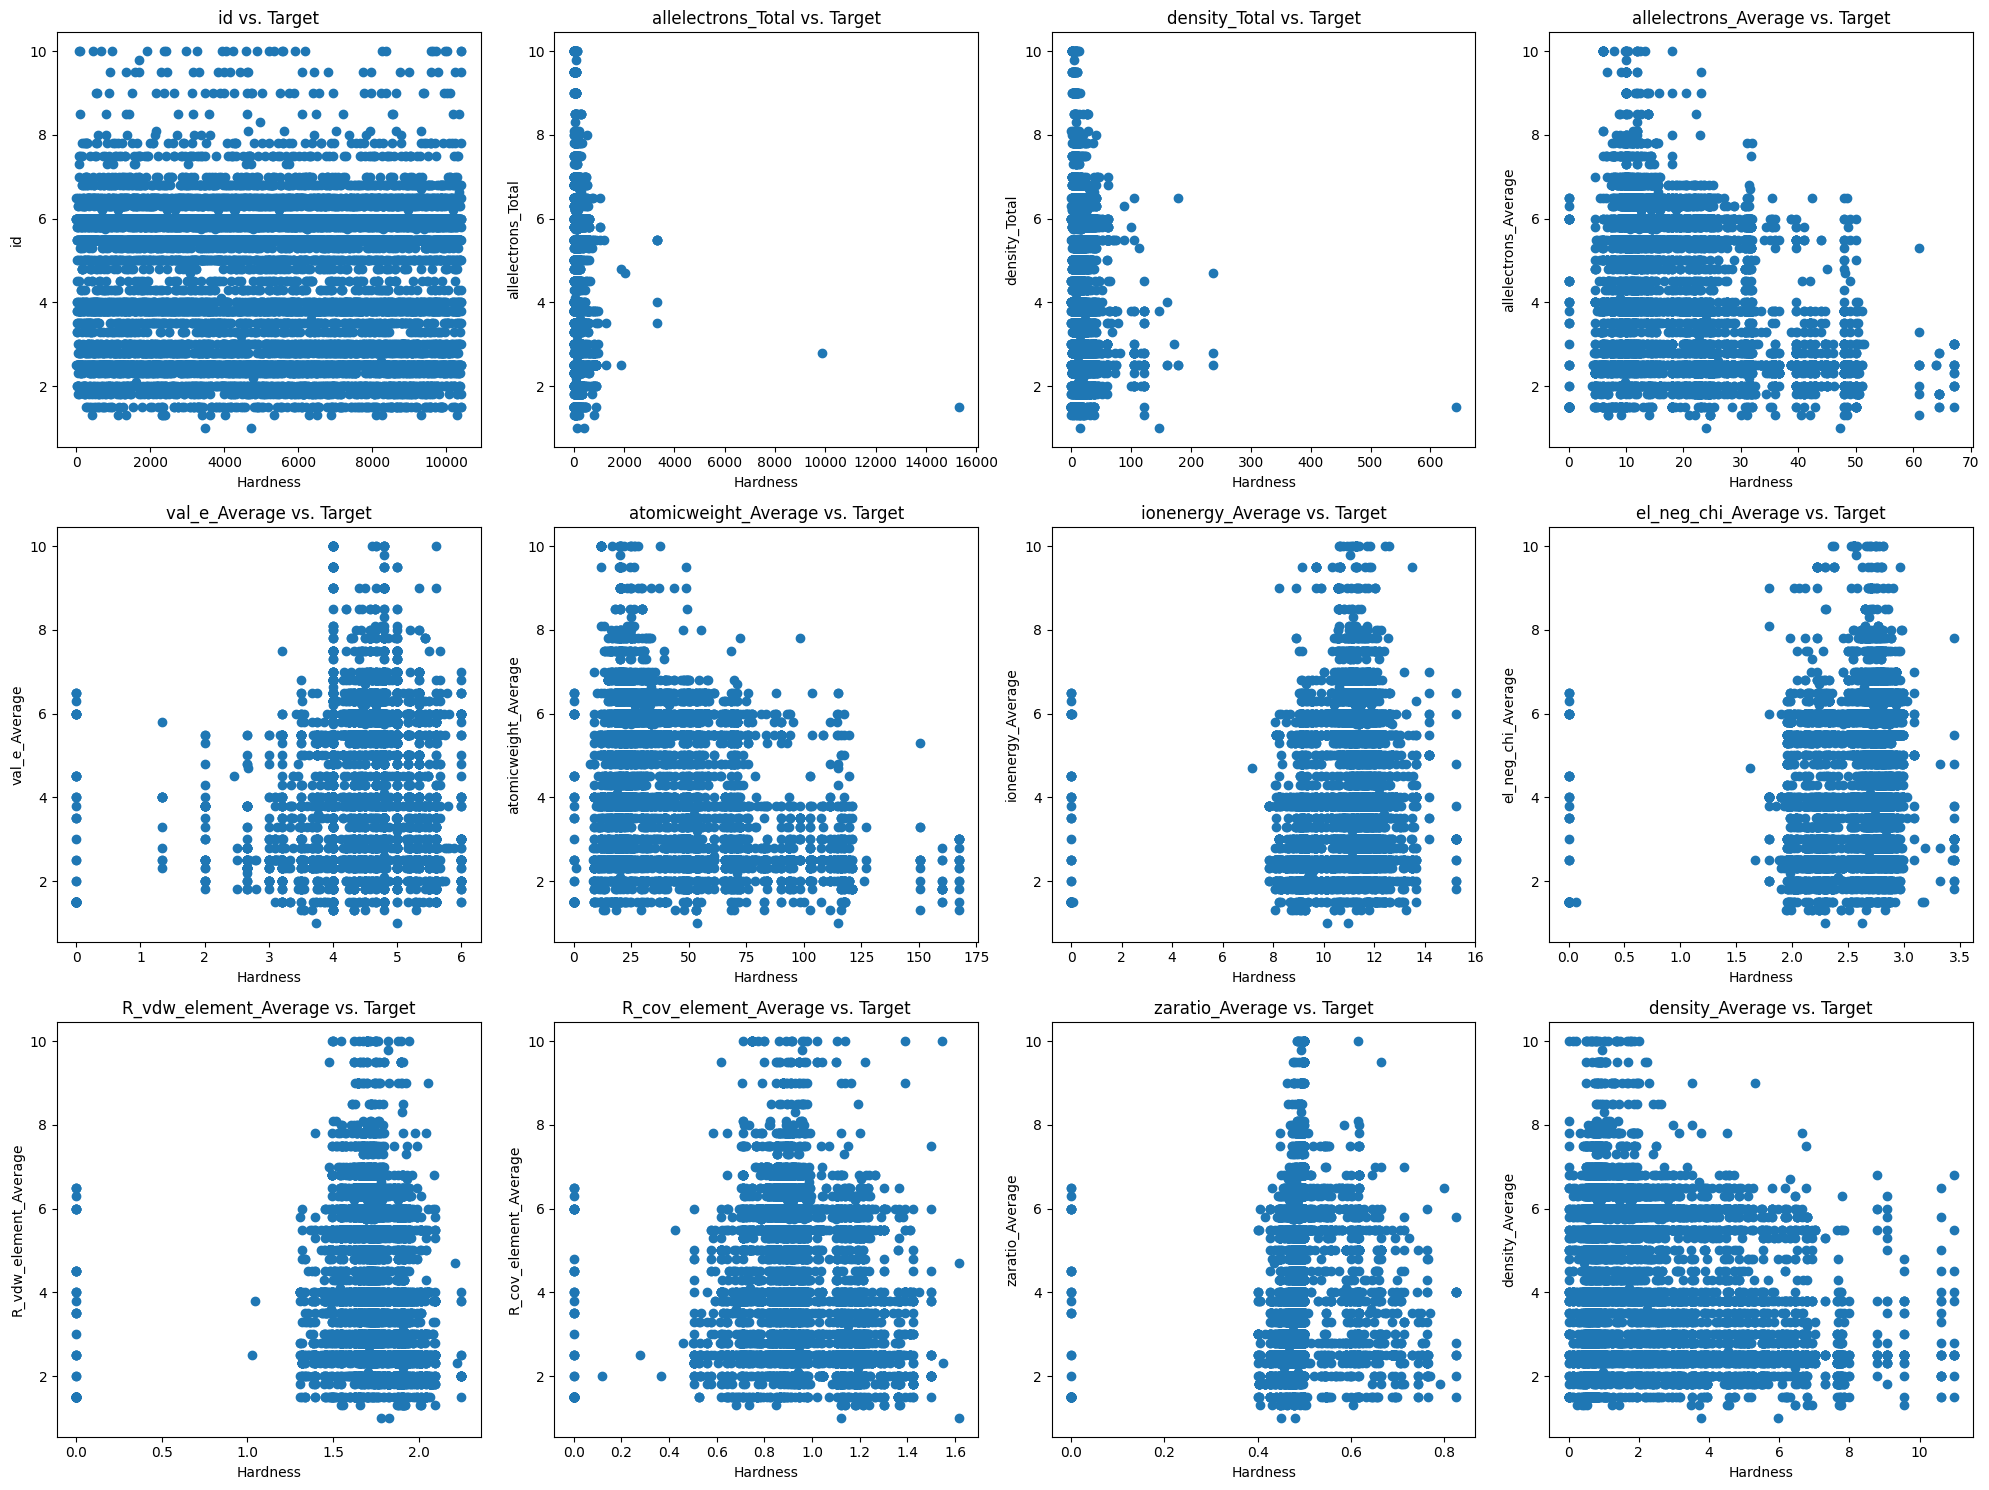

In [5]:
#scatterplot for checking a linear relationship between the hardness and other features in the df_train
# Assuming df is your DataFrame and 'target' is the name of your target column
features = df_train.columns.drop('Hardness')  # Exclude the target variable from the features list

# Set the number of plots per row
plots_per_row = 4
total_plots = len(features)
rows = total_plots // plots_per_row + (1 if total_plots % plots_per_row else 0)

fig, axs = plt.subplots(rows, plots_per_row, figsize=(5 * plots_per_row, 5 * rows))
axs = axs.flatten()  # Flatten the array to make iteration easier

for i, feature in enumerate(features):
    axs[i].scatter(df_train[feature], df_train['Hardness'])
    axs[i].set_title(f'{feature} vs. Target')
    axs[i].set_xlabel('Hardness')
    axs[i].set_ylabel(feature)

# Hide any unused subplots
for ax in axs[len(features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

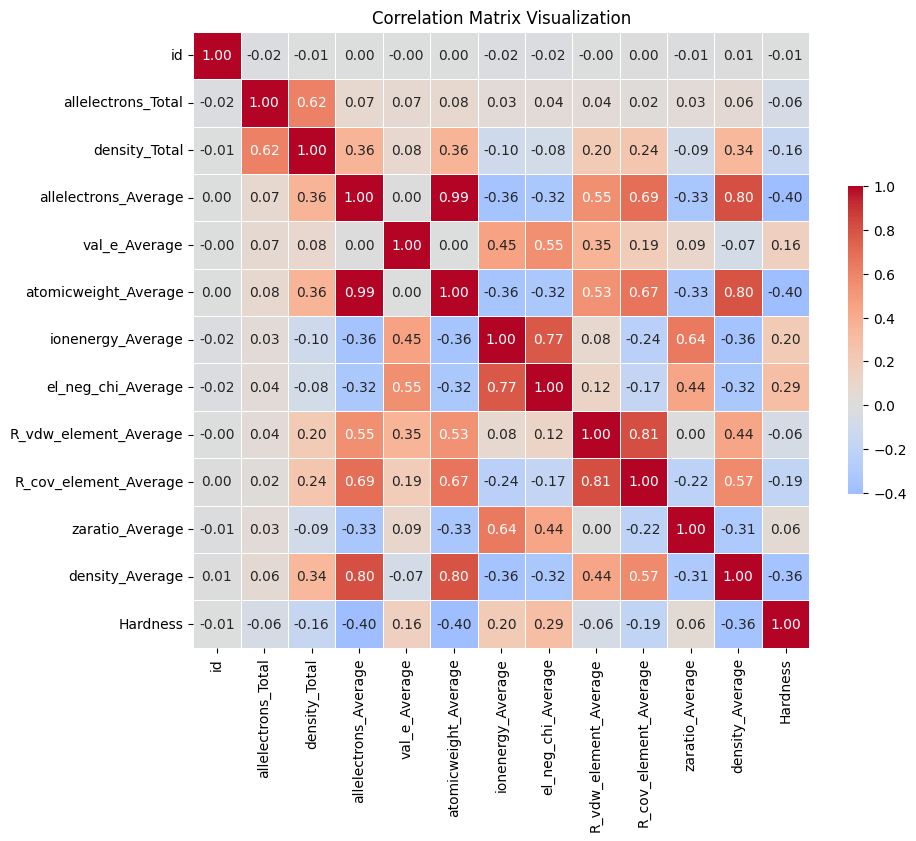

In [6]:
#correlation heatmap to show the correlation in the train set
# Calculate correlation matrix
corr_matrix = df_train.corr()
import seaborn as sns


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Visualization')
plt.show()

In [7]:
#feature scaling using standardisation

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
df_features = df_train.drop(['Hardness','id'],axis=1)

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(df_features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_features.columns)
df_scaled

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,-0.125176,-0.854598,-0.671863,0.366532,-0.649538,0.106370,0.472806,0.003480,-0.467381,0.043139,-0.629163
1,-0.125176,-0.434060,-0.671863,0.366532,-0.661596,0.782925,0.439960,-0.521272,-0.189615,-0.009986,-0.730874
2,-0.232265,-0.350946,-0.136912,1.524558,-0.144879,0.815215,0.657942,0.294432,-0.445159,-0.188197,-0.323591
3,-0.125176,-0.356625,-0.671863,0.366532,-0.664885,0.007237,0.120452,-0.547250,-0.045177,-0.064634,-0.693814
4,-0.053783,-0.307620,-0.519020,0.366532,-0.481317,0.629290,0.472806,-0.256298,-0.267389,-0.009717,-0.138479
...,...,...,...,...,...,...,...,...,...,...,...
10402,-0.000239,-0.434060,-0.480809,-0.791495,-0.427606,0.278461,0.108507,-0.521272,-0.289611,0.043139,-0.173975
10403,-0.437518,-0.798153,-0.671863,1.138549,-0.643602,2.290588,1.440289,-0.907476,-0.430345,-0.205446,-0.680682
10404,0.303180,1.028584,0.713280,1.379805,0.614454,-0.613552,-0.933627,-0.968091,0.977000,-0.374683,-0.009080
10405,-0.401822,-0.810048,-0.417124,0.173527,-0.418515,0.249768,0.405122,0.131637,0.199257,-0.108474,-0.699917


In [8]:
#feature engineering for the features 


In [9]:
#feature engineering for the features 
# Splitting the data into features and target
X = df_scaled
y = df_train['Hardness']

from sklearn.model_selection import train_test_split
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbm_model.fit(X_train, y_train)

# Predictions
predictions = gbm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.500606339885712


In [10]:
from sklearn.metrics import r2_score
# Calculate the R² score
r2 = r2_score(y_test, predictions)
print(f'R² score: {r2:.4f}')




R² score: 0.4479


In [11]:
df_tes = df_test.drop(['id'],axis=1)
df_tes

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459
1,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194
2,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834
3,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466
4,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456
...,...,...,...,...,...,...,...,...,...,...,...
6934,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548
6935,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045
6936,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425
6937,40.0,2.334164,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.51227


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
test_features = scaler.fit_transform(df_tes)

# Create a new DataFrame with the scaled features
df_tes = pd.DataFrame(test_features, columns=df_tes.columns)
test_features

array([[ 3.64992312,  5.61748781,  1.63286308, ...,  1.39669651,
        -0.48953405, -0.18256509],
       [-0.17566952, -0.25615297,  0.05400621, ..., -0.47774614,
        -0.25448403, -0.37798697],
       [-0.05039822, -0.37015956, -0.52806084, ...,  0.0578089 ,
         0.12888122, -0.6964636 ],
       ...,
       [-0.2816683 , -0.53994253, -0.55231363, ..., -0.1839347 ,
         0.12165003, -0.72408772],
       [-0.41657585, -0.65643562, -0.97673752, ..., -1.8575442 ,
         2.82981033, -0.83745437],
       [ 0.03632806,  0.14730354,  4.51045706, ...,  2.56822316,
        -1.48032228, -0.87418439]])